# Load Data & Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

bank_data = pd.read_csv('bank-additional.csv', sep=';', header=0)

In [2]:
bank_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

# Preprocessing

In [80]:
# kodekan data kategori
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [77]:
bank_data.index.values

array([   0,    1,    2, ..., 4116, 4117, 4118], dtype=int64)

In [78]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [127]:
bank_data['y'] = bank_data.y.replace({1: "yes", 0: "no"})

In [129]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [130]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [85]:
encoder_X = ColumnTransformer(
        [('bank_data', OneHotEncoder(), [0])], 
        remainder='passthrough'
        )
X = encoder_X.fit_transform(X).astype(float) # mengembalikan ke dalam tipe 'float64'

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [81]:
X = bank_data.iloc[:, :-1].values
y = bank_data.iloc[:, -1].values

In [82]:
# y adalah dependent, cukup kodekan ke angka
from sklearn.preprocessing import LabelEncoder

In [83]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [84]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


# Logistic Regression (Analyzing Data)

<AxesSubplot:>

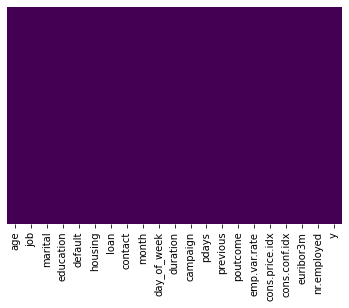

In [13]:
#Missing Data
sns.heatmap(bank_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='campaign', ylabel='count'>

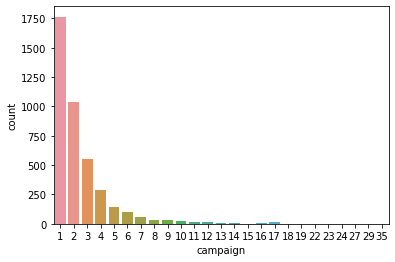

In [14]:
#Countplot of people who campaign 

sns.countplot(x="campaign", data=bank_data)

<AxesSubplot:xlabel='campaign', ylabel='count'>

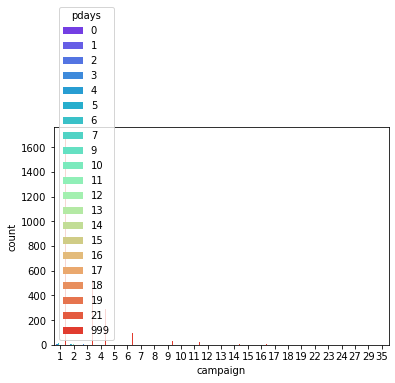

In [16]:
#Countplot of people who campaign based on their Pdays.

sns.countplot(x='campaign',hue='pdays',data=bank_data,palette='rainbow')

# Logistic Regression (Data Cleaning)

<AxesSubplot:xlabel='campaign', ylabel='poutcome'>

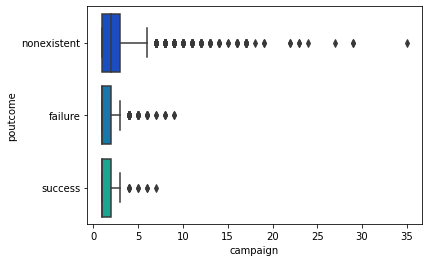

In [23]:
sns.boxplot(x='campaign',y='poutcome',data=bank_data,palette='winter')

In [24]:
def impute_poutcome(cols):
    poutcome = cols[0]
    campaign = cols[1]
    
    if pd.isnull(poutcome):

        if campaign == 1:
            return 37

        elif poutcome == 2:
            return 29

        else:
            return 24

    else:
        return poutcome

bank_data['poutcome'] = bank_data[['poutcome','campaign']].apply(impute_poutcome,axis=1)

In [26]:
bank_data.drop('education',axis=1,inplace=True)
bank_data.dropna(inplace=True)

# Logistic Regression (Building Logistic Regression) Train Data

In [4]:
x=bank_data.drop("campaign",axis=1)
y=bank_data["campaign"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
                                                

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
logmodel=LogisticRegression()

In [11]:
logmodel.fit(x_train, y_train)

ValueError: could not convert string to float: 'blue-collar'

In [13]:
predictions = logmodel.predict(x_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [41]:
from sklearn.metrics import classification_report

In [51]:
classification_report(y_test,predictions)

NameError: name 'predictions' is not defined

#  Logistic Regression (confussion matrix)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,predictions)

NameError: name 'predictions' is not defined

# Logistic Regression (accuration score)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,predictions)

NameError: name 'predictions' is not defined

# Naive Bayes

In [14]:
bank_data.empty

False

In [17]:
# Variabel independen
x = bank_data.drop(['campaign'], axis = 1)
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [19]:
# Variabel dependen
y = bank_data['campaign']
y.head()

0    2
1    4
2    1
3    3
4    1
Name: campaign, dtype: int64

In [27]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [36]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(x_train, y_train)
nbtrain.class_count_

ValueError: could not convert string to float: 'admin.'

In [37]:
# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(x_test)
y_pred

NameError: name 'nbtrain' is not defined

In [38]:
# Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(x_test)

NameError: name 'nbtrain' is not defined

In [39]:
# import confusion_matrix model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [40]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

NameError: name 'y_pred' is not defined

# Support Vector Machine (SVM)

In [88]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [68]:
bank_data.isnull ().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [69]:
print(bank_data.duplicated().value_counts()) # To check duplicated values

False    4119
dtype: int64


In [70]:
bank_data._get_numeric_data().columns.tolist()

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

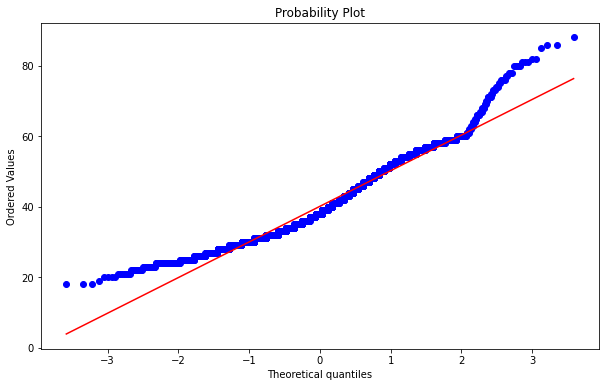

In [131]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(bank_data["age"], dist="norm", plot=plt)
plt.show()

<AxesSubplot:>

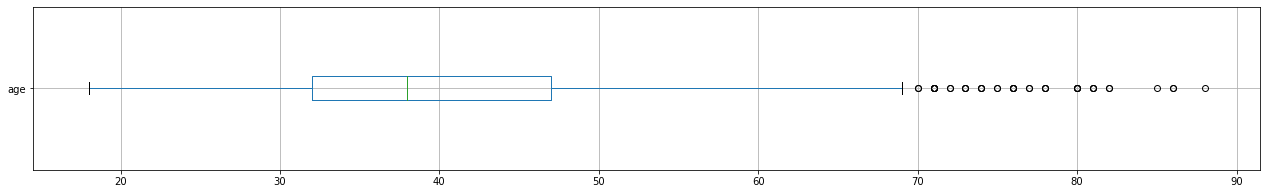

In [9]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(bank_data, columns=['age'])
temp_df.boxplot(vert=False)

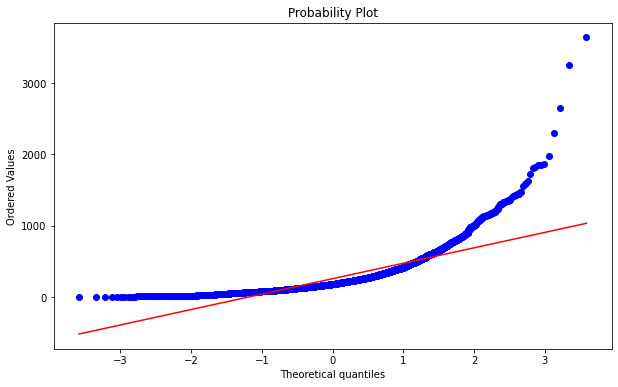

In [10]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(bank_data["duration"], dist="norm", plot=plt)
plt.show()

<AxesSubplot:>

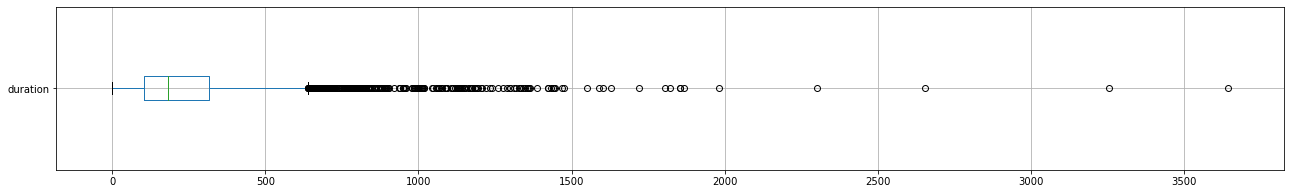

In [11]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(bank_data, columns=['duration'])
temp_df.boxplot(vert=False)

In [12]:
X = bank_data.drop(['duration'], axis = 1)

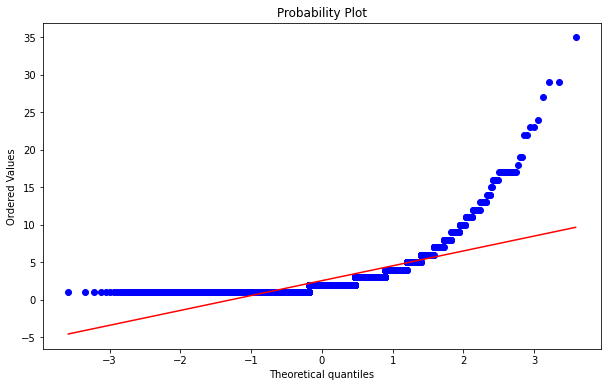

In [13]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(X["campaign"], dist="norm", plot=plt)
plt.show()

<AxesSubplot:>

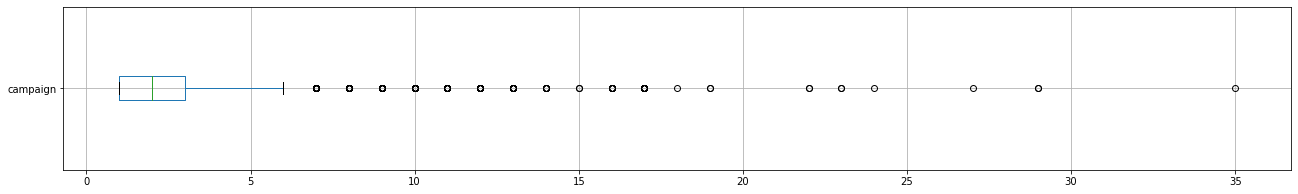

In [14]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(X, columns=['campaign'])
temp_df.boxplot(vert=False)

In [15]:
X=X[X['campaign']<50]
X=X.reset_index(drop=True)

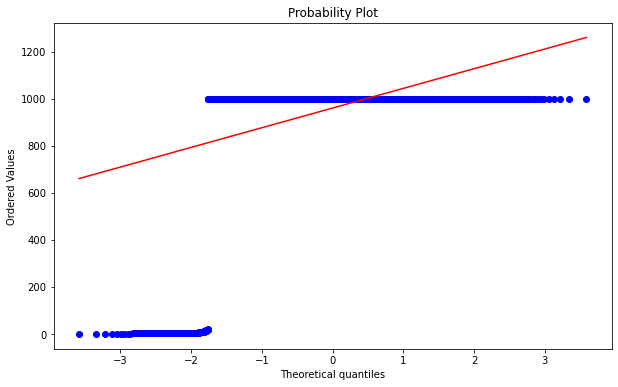

In [16]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(X["pdays"], dist="norm", plot=plt)
plt.show()

<AxesSubplot:>

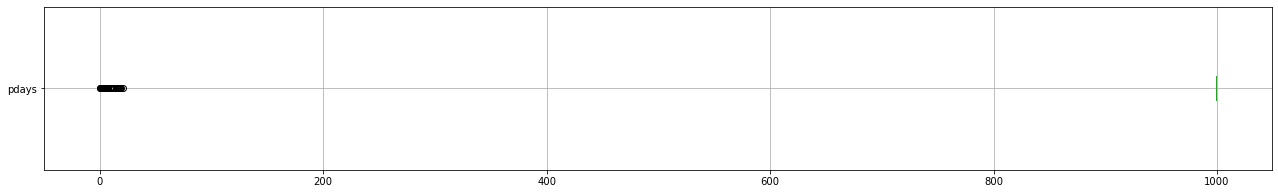

In [17]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(X, columns=['pdays'])
temp_df.boxplot(vert=False)

In [18]:
len(X[X['pdays']==999])

3959

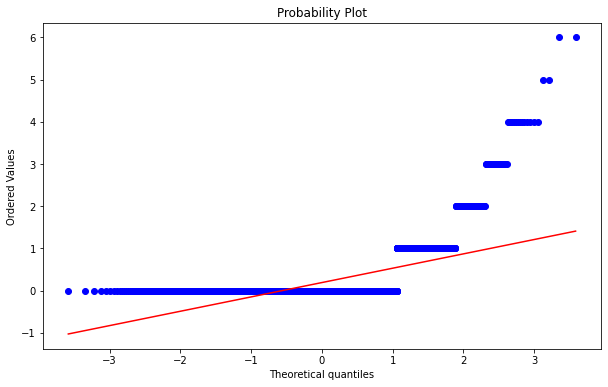

In [19]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(X["previous"], dist="norm", plot=plt)
plt.show()

<AxesSubplot:>

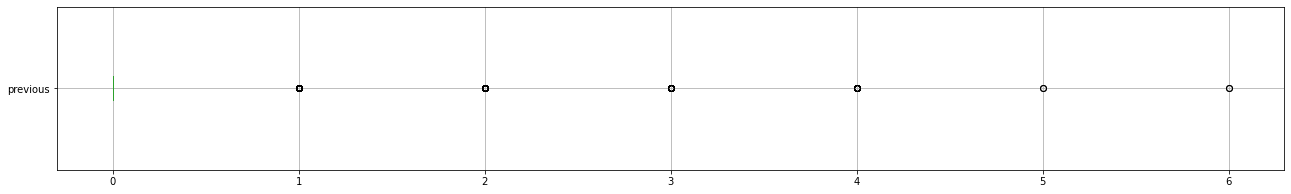

In [20]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(X, columns=['previous'])
temp_df.boxplot(vert=False)

In [21]:
X['previous'].value_counts()

0    3523
1     475
2      78
3      25
4      14
5       2
6       2
Name: previous, dtype: int64

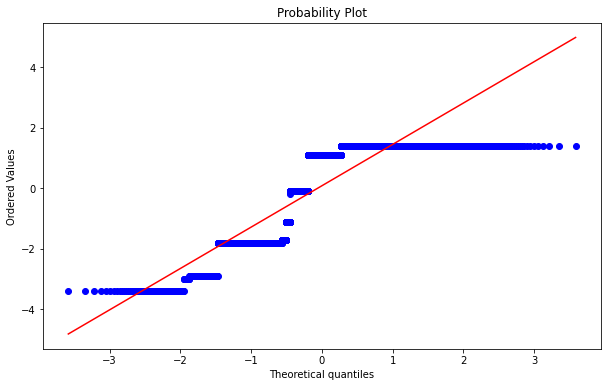

In [23]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(X["emp.var.rate"], dist="norm", plot=plt)
plt.show()

<AxesSubplot:>

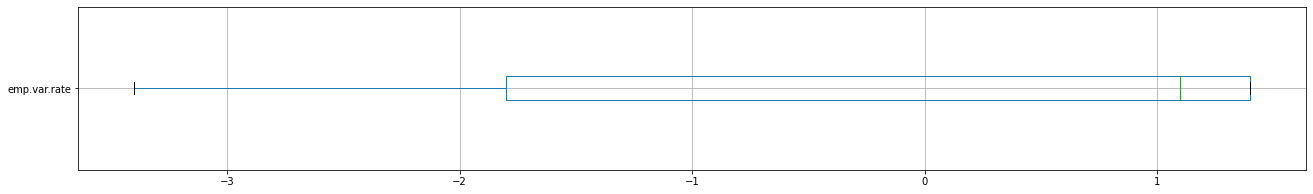

In [24]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(X, columns=['emp.var.rate'])
temp_df.boxplot(vert=False)

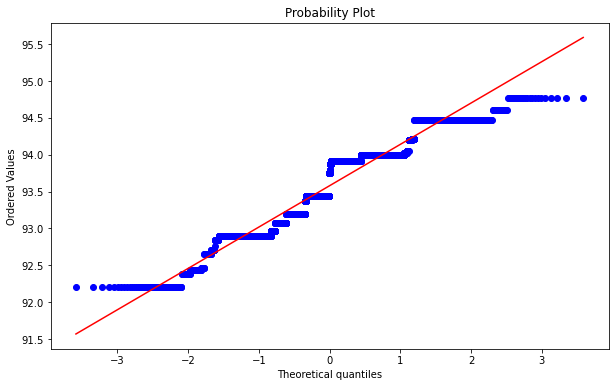

In [27]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(X["cons.price.idx"], dist="norm", plot=plt)
plt.show()

<AxesSubplot:>

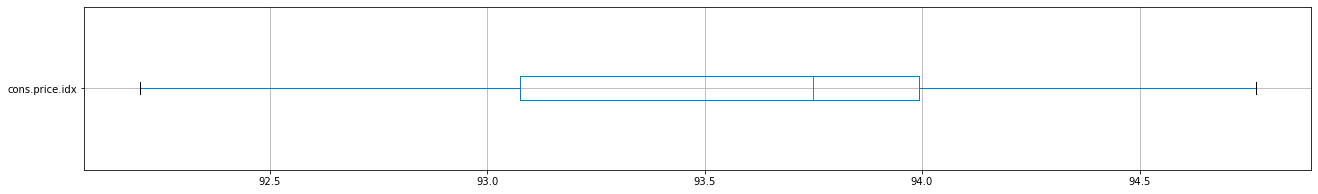

In [28]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(X, columns=['cons.price.idx'])
temp_df.boxplot(vert=False)

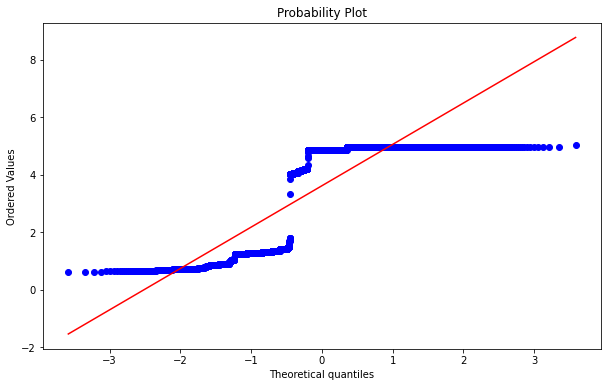

In [30]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(X["euribor3m"], dist="norm", plot=plt)
plt.show()

<AxesSubplot:>

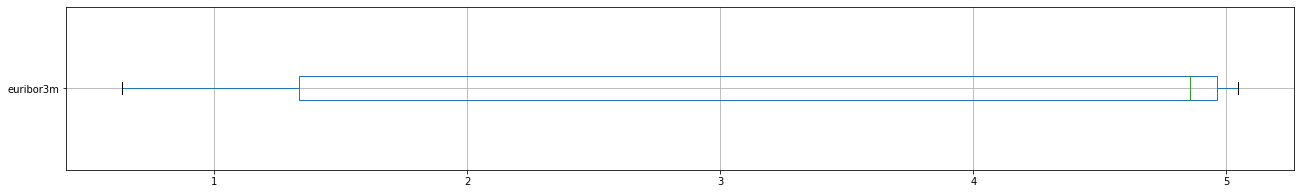

In [31]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(X, columns=['euribor3m'])
temp_df.boxplot(vert=False)

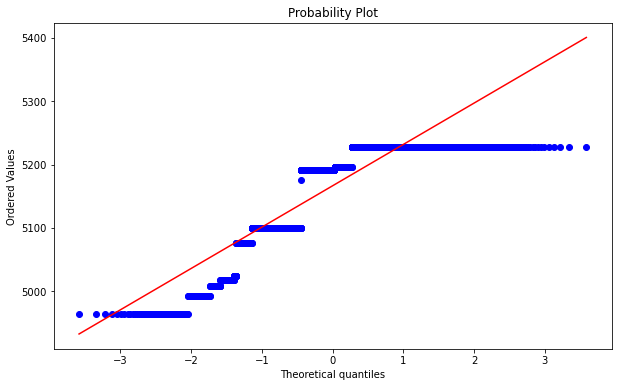

In [33]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(X["nr.employed"], dist="norm", plot=plt)
plt.show()

<AxesSubplot:>

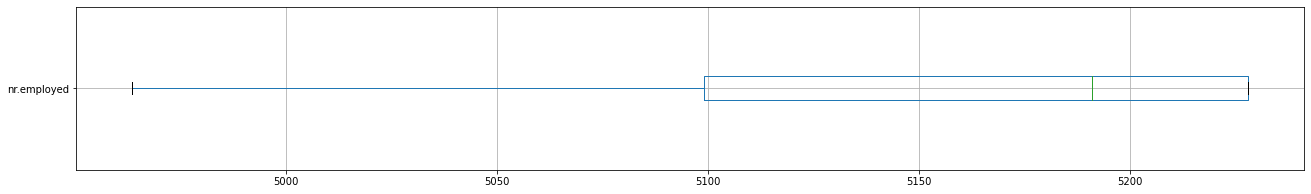

In [34]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(X, columns=['nr.employed'])
temp_df.boxplot(vert=False)

In [39]:
cols_ForHist= X._get_numeric_data().columns.to_list()
cols_ForHist.remove('y')
cols_ForHist

ValueError: list.remove(x): x not in list

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>,
        <AxesSubplot:title={'center':'cons.price.idx'}>],
       [<AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr.employed'}>]], dtype=object)

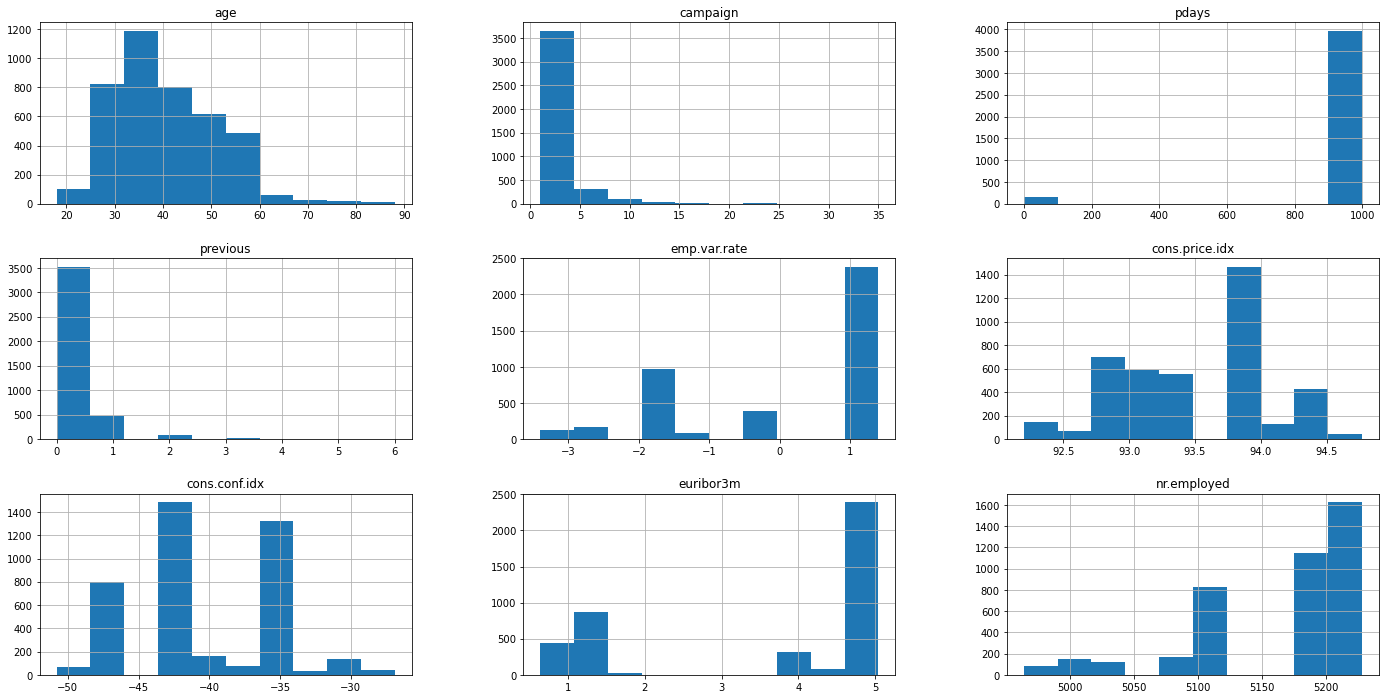

In [40]:
plt.rcParams["figure.figsize"] = (24, 12)
X[cols_ForHist].hist()

In [41]:
plt.rcParams["figure.figsize"] = (8, 6)
from sklearn.preprocessing import FunctionTransformer

<AxesSubplot:>

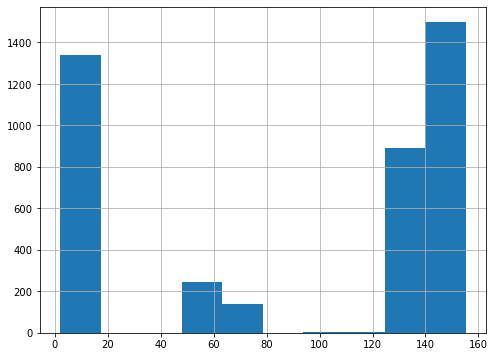

In [42]:
exponential_transformer = FunctionTransformer(np.exp,validate=True)
exponential_transformer.fit(X[['euribor3m']])
X['euribor3m'] = exponential_transformer.transform(X[['euribor3m']])
X['euribor3m'].hist()

<AxesSubplot:>

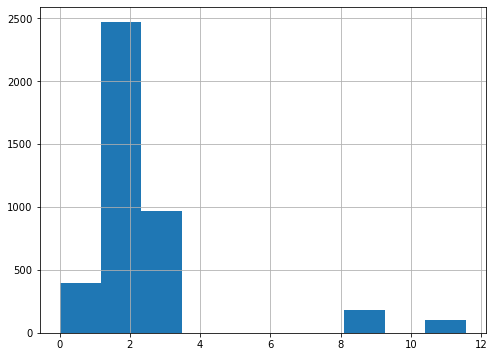

In [44]:
exponential_transformer = FunctionTransformer(lambda x: x ** 2)
exponential_transformer.fit(X[['emp.var.rate']])
X['emp.var.rate'] = exponential_transformer.transform(X[['emp.var.rate']])
X['emp.var.rate'].hist()

<AxesSubplot:>

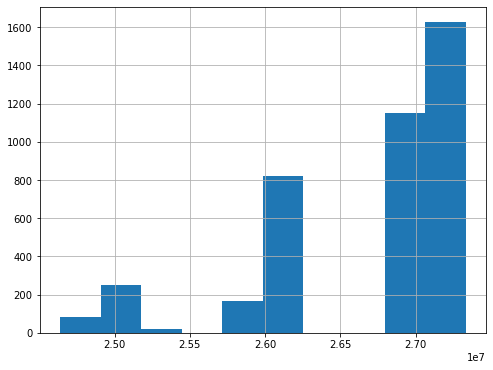

In [46]:
logarithm_transformer = FunctionTransformer(lambda x: x ** 2, validate=True)
logarithm_transformer.fit(X[['nr.employed']])
X['nr.employed'] = logarithm_transformer.transform(X[['nr.employed']])
X['nr.employed'].hist()

In [47]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
X['age'] = pd.cut(X['age'], bins, labels = labels,include_lowest = True)

In [48]:
cols = X.columns
num_cols = X._get_numeric_data().columns
cat_cols=  list(set(cols) - set(num_cols))
add_cat = ['pdays','previous','campaign']
for x in add_cat:
    cat_cols.append(x)
for col in X[cat_cols]:
    print(col,"--->",X[col].unique())
    print("")

age ---> ['18-29', '30-39', '40-49', '50-59', '70+', '60-69']
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

loan ---> ['no' 'unknown' 'yes']

job ---> ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']

default ---> ['no' 'unknown' 'yes']

day_of_week ---> ['fri' 'wed' 'mon' 'thu' 'tue']

education ---> ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']

contact ---> ['cellular' 'telephone']

y ---> ['no' 'yes']

marital ---> ['married' 'single' 'divorced' 'unknown']

housing ---> ['yes' 'no' 'unknown']

month ---> ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']

poutcome ---> ['nonexistent' 'failure' 'success']

pdays ---> [999  12   3   6   5   2  10  11   7   1  18   4  15   0  16   9  19  17
  13  21  14]

previous ---> [0 2 1 3 5 4 6]

campaign ---> [ 2  4  1  3  6  7 27

In [49]:
for col in X[cat_cols]:
   print(col+'-Values ')
   print(X[col].value_counts())
   print("")

age-Values 
30-39    1614
40-49    1030
18-29     728
50-59     668
60-69      42
70+        37
Name: age, dtype: int64

loan-Values 
no         3349
yes         665
unknown     105
Name: loan, dtype: int64

job-Values 
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

default-Values 
no         3315
unknown     803
yes           1
Name: default, dtype: int64

day_of_week-Values 
thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64

education-Values 
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64

contact-Values 
c

In [50]:
X = X.drop(['default'], axis = 1)
cat_cols.remove('default')
from sklearn.preprocessing import LabelEncoder
labelencoder =LabelEncoder()
dummies= []
for col in X[cat_cols]:
   temp_dummies = pd.get_dummies(X[col],prefix=col)
   dummies += (temp_dummies.columns.to_list())
   X=pd.concat([X, temp_dummies], axis=1)
   X = X.drop(col, axis = 1)
print(dummies)

['age_18-29', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69', 'age_70+', 'loan_no', 'loan_unknown', 'loan_yes', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'contact_cellular', 'contact_telephone', 'y_no', 'y_yes', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'housing_no', 'housing_unknown', 'housing_yes', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'pdays_

In [51]:
xa_Encode = X.copy()
xa_Encode.isnull().sum()

emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
                 ..
campaign_23       0
campaign_24       0
campaign_27       0
campaign_29       0
campaign_35       0
Length: 116, dtype: int64

In [97]:
Remove_columns_values = dummies
Remove_columns_values.append('y')
X_without_Cat=X.drop(Remove_columns_values, axis = 1)
X_without_Cat.head()

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_without_Cat)
X_Scaled = scaler.transform(X_without_Cat)
columns_value_new=X_without_Cat.columns
X_Scaled_Except = pd.DataFrame(X_Scaled, columns=columns_value_new)
X_Scaled_Except.head(5)

NameError: name 'X_without_Cat' is not defined

In [98]:
plt.rcParams["figure.figsize"] = (24, 12)
X_Scaled_Except.hist()

NameError: name 'X_Scaled_Except' is not defined

In [99]:
data_Final =X_Scaled_Except
for f in dummies:
     data_Final = data_Final.join(xa_Encode[f])

NameError: name 'X_Scaled_Except' is not defined

In [100]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(X_Scaled_Except.corr(),annot=True); 
#Seems they can be assuemed as independent

NameError: name 'X_Scaled_Except' is not defined

In [101]:
X_Scaled_Except.corr()

NameError: name 'X_Scaled_Except' is not defined

In [102]:
X_Scaled_Except['y']=xa_Encode['y']
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(X_Scaled_Except.corr(),annot=True);

KeyError: 'y'

In [103]:
X_Scaled_Except.corr()

NameError: name 'X_Scaled_Except' is not defined

In [104]:
Y=data_Final['y']
data_Final_without_Y = data_Final.drop('y', axis = 1)

NameError: name 'data_Final' is not defined

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(data_Final_without_Y)
X_PCA = pca.transform(data_Final_without_Y)
#X_pca_test = pca.transform(X_test)
X_PCA = pd.DataFrame(data = X_PCA)
pca.explained_variance_ratio_[:30].sum()

NameError: name 'data_Final_without_Y' is not defined

In [106]:
from sklearn.model_selection import train_test_split
X_class_train, X_test, y_class_train, y_test = train_test_split(data_Final_without_Y, Y, test_size=0.2, random_state=0)

NameError: name 'data_Final_without_Y' is not defined

In [107]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (8, 6)
data_Final['y'].value_counts()
sns.countplot(x='y', data=data_Final)
plt.show()

NameError: name 'data_Final' is not defined

In [108]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = X_class_train.columns
data_X, data_y = os.fit_sample(X_class_train, y_class_train)
smoted_X = pd.DataFrame(data=data_X,columns=columns )
smoted_y = pd.DataFrame(data=data_y,columns=['y'])

ModuleNotFoundError: No module named 'imblearn'

In [109]:
sns.countplot(x='y', data=smoted_y)
plt.show()

NameError: name 'smoted_y' is not defined

In [110]:
X_train = smoted_X
y_train = smoted_y
X_test
y_test

NameError: name 'smoted_X' is not defined

In [111]:
from sklearn import svm
from matplotlib import pyplot as plt
%matplotlib inline

In [112]:
svc = svm.SVC(kernel='rbf', C=70, gamma=0.001).fit(X_train,y_train)
predictionsvm = svc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictionsvm))

NameError: name 'X_train' is not defined

In [113]:
predictionsvm = svc.predict(X_test)
percentage = svc.score(X_test,y_test)
percentage      #0.8614955086185967

NameError: name 'svc' is not defined

In [114]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(svc, X_test, y_test,display_labels=["0",'1'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix ")
plt.show()

NameError: name 'svc' is not defined

# K-Nearest Neighbors

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(bank_data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

ValueError: could not convert string to float: 'blue-collar'

In [119]:
from sklearn.neighbors import KNeighborsClassifier
kNN=KNeighborsClassifier()

In [121]:
kNN.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [122]:
predictions = kNN.predict(X_test)

NameError: name 'X_test' is not defined

In [123]:
predictions

NameError: name 'predictions' is not defined

In [124]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

NameError: name 'confusion_matrix' is not defined

In [125]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
   
plt.figure(figsize=(10, 6))

plt.plot(range(1, 40), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')

NameError: name 'X_train' is not defined

# Random Forest